In [190]:
%matplotlib inline
import csv, json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [191]:
townships = []
features = []

In [192]:
def fill(x):
    if len(x) == 0:
        x = '0'
    return float(x)

In [193]:
with open('../data/cleaned/allrawderivedfeatures.csv', 'r') as features_file:
    reader = csv.reader(features_file)
    for row in reader:
        items = list(map(fill, row[3:]))
        township_name = '-'.join([row[0], row[1], row[2]])
        townships.append(township_name)
        features.append(items)

In [194]:
len(features)

330

In [195]:
len(features[0])

417

In [196]:
len(townships)

330

In [197]:
kmeans = KMeans(n_clusters=3).fit(features)

In [198]:
clusters = kmeans.labels_

In [199]:
vital_feature_names = []
vital_features = []

In [200]:
with open('../data/cleaned/featurescaredabout.csv', 'r') as features_cared_file:
    reader = csv.reader(features_cared_file)
    num_count = 0
    for row in reader:
        items = row[3:]
        if num_count == 0:
            vital_feature_names = items
        else:
            vital_features.append(list(map(float, items)))
        num_count += 1

In [201]:
print(vital_feature_names)

['Total Population', '% rural', '% 0014', '% currently attending school/college', '% 10yr and older in paid employment', '% in institutions', 'percentile mean household', '% HQ housing', '% LQ housing', '% households with access to safe sanitation', '% households w/ electricity as source', '% households w/ solar systems as source', '% households w/ relatively efficient sources of lighting', '% households w/ relatively poor sources of lighting', '% cooking fuel electricity', '% cooking fuel that costs natural resources', '% cooking fuel that is fuel0based and requires transport', '% availability to TV', '% availibility to mobile phone', '% availiability to radio', '% availiability to computer', '% availiability to Internet', '% availiability to car/truck/van', '% availability to 40wheel tractor', '% availibility to motor boat']


In [202]:
x_labels = ['% HQ housing']
x_indices = [vital_feature_names.index(f) for f in x_labels]

In [203]:
print(x_labels, x_indices)

['% HQ housing'] [7]


In [204]:
y_labels = ['Total Population', \
            '% households w/ solar systems as source', \
            '% households w/ electricity as source', \
            '% households w/ relatively efficient sources of lighting', \
            '% households w/ relatively poor sources of lighting', \
            '% cooking fuel electricity', \
            '% cooking fuel that is fuel0based and requires transport', \
            '% cooking fuel that costs natural resources', \
            '% households with access to safe sanitation', \
            '% 10yr and older in paid employment', \
            '% rural']
y_indices = [vital_feature_names.index(f) for f in y_labels]

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


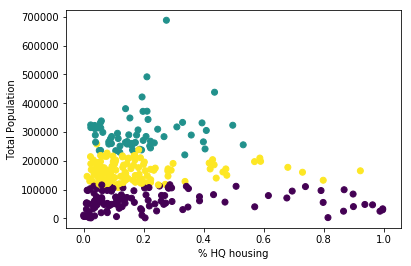

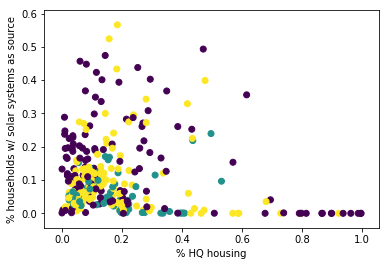

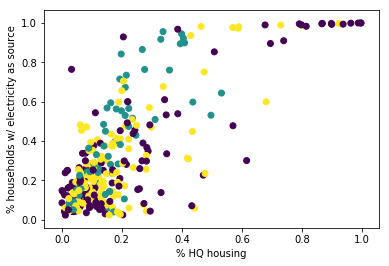

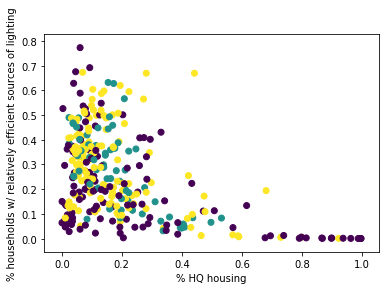

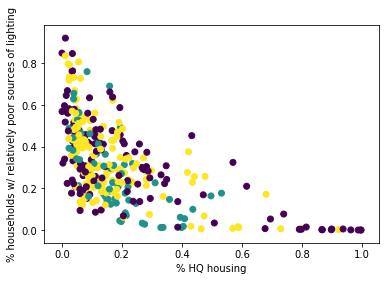

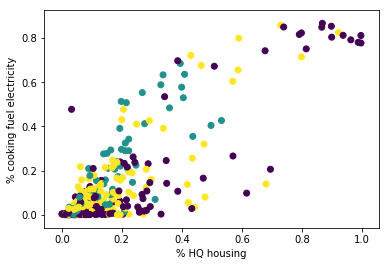

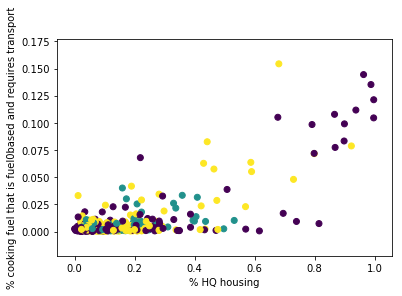

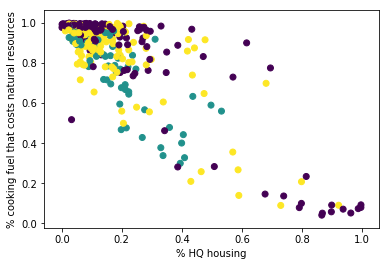

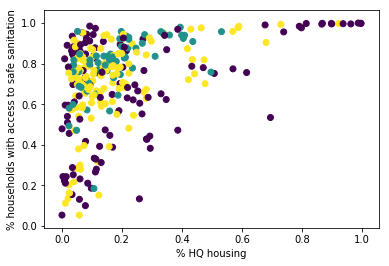

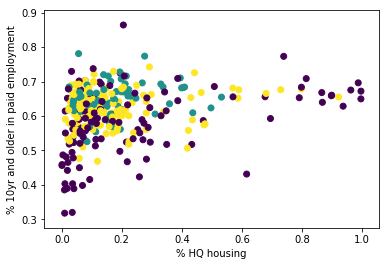

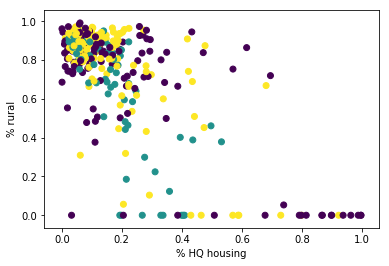

In [205]:
for i in range(len(x_indices)):
    for j in range(len(y_indices)):
        plt.figure()
        x_values = [vital_features[k][x_indices[i]] for k in range(len(vital_features))]
        y_values = [vital_features[k][y_indices[j]] for k in range(len(vital_features))]
        plt.xlabel(x_labels[i])
        plt.ylabel(y_labels[j])
        plt.legend()
        plt.scatter(x_values, y_values, c=clusters)

In [206]:
raw_derived_subset = []

In [207]:
with open('../data/cleaned/finalfeatures.csv', 'r') as features_file:
    reader = csv.reader(features_file)
    num_count = 0
    for row in reader:
        if num_count > 0:
            items = list(map(fill, row[3:]))
            raw_derived_subset.append(items)
        num_count += 1

In [208]:
len(raw_derived_subset)

330

In [209]:
len(raw_derived_subset[0])

24

In [210]:
len(townships)

330

In [211]:
kmeans2 = KMeans(n_clusters=3).fit(raw_derived_subset)

In [212]:
clusters2 = kmeans2.labels_

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


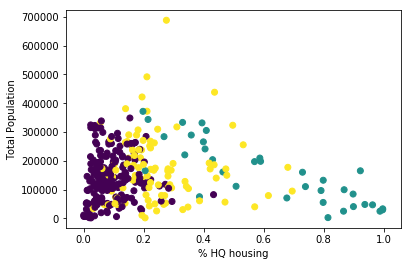

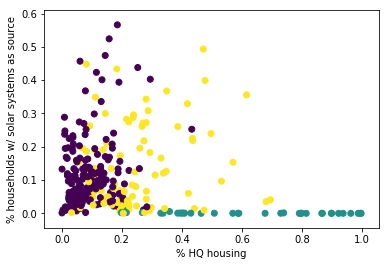

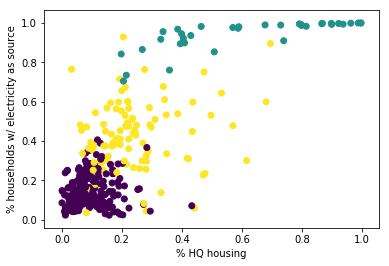

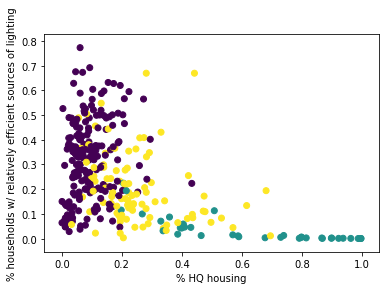

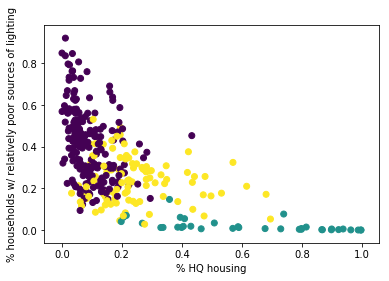

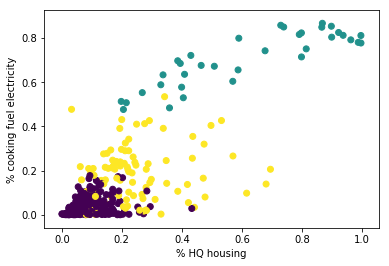

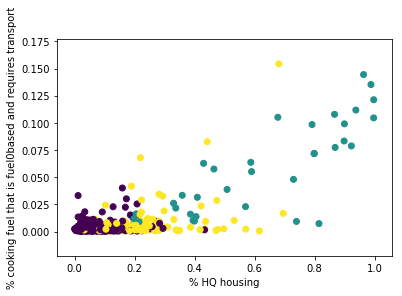

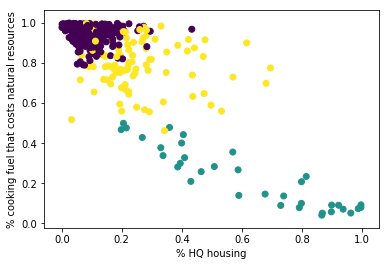

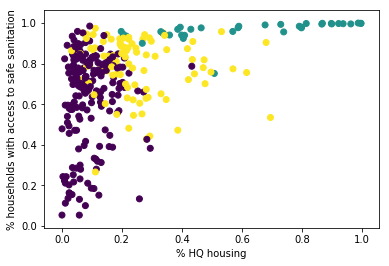

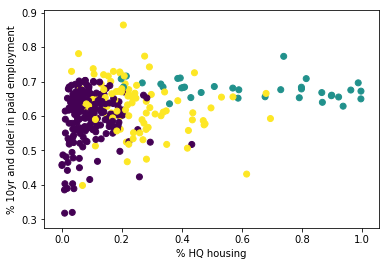

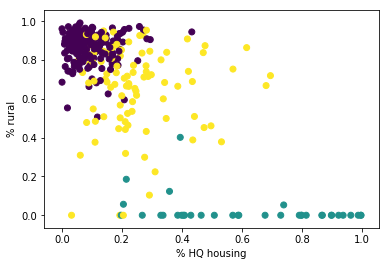

In [257]:
for i in range(len(x_indices)):
    for j in range(len(y_indices)):
        plt.figure()
        x_values = [vital_features[k][x_indices[i]] for k in range(len(vital_features))]
        y_values = [vital_features[k][y_indices[j]] for k in range(len(vital_features))]
        plt.xlabel(x_labels[i])
        plt.ylabel(y_labels[j])
        plt.scatter(x_values, y_values, c=clusters2)
        plt.legend()
        plt.savefig('../results/fin/' + '-'.join([str(i), str(j)]) + '.png')

In [258]:
for i in range(len(townships)):
    if vital_features[i][x_indices[0]] > 0.4 and vital_features[i][y_indices[2]] < 0.4:
        print(townships[i], clusters2[i])

Tanintharyi-Kawthoung-   Kawthoung 2
Shan-Taunggyi-Pindaya 2
Shan-Taunggyi-Ywangan 0
Shan-Taunggyi-Pinlaung 2
Shan-Lashio-Hseni 2
Shan-Kyaukme-Nawnghkio 2
Shan-Kengtung-Kengtung 2


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


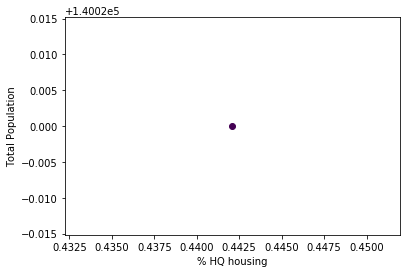

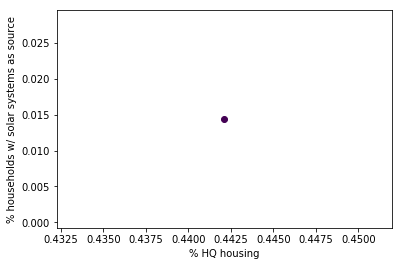

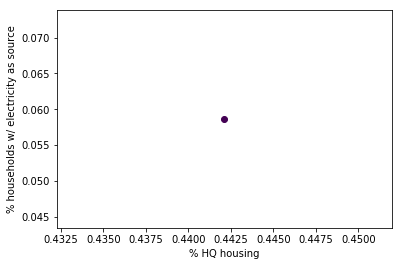

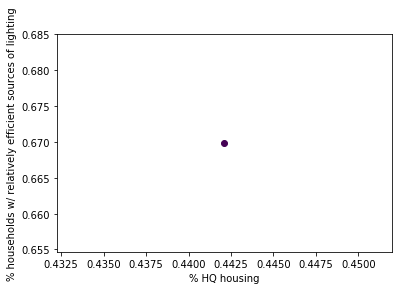

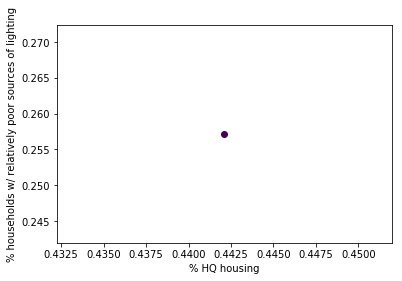

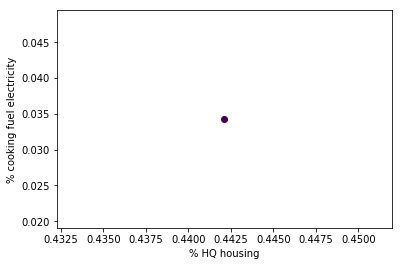

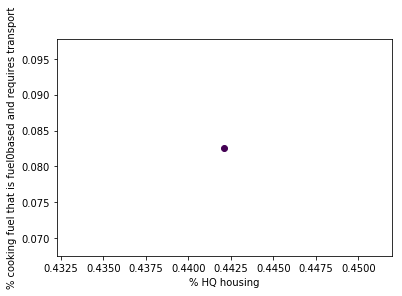

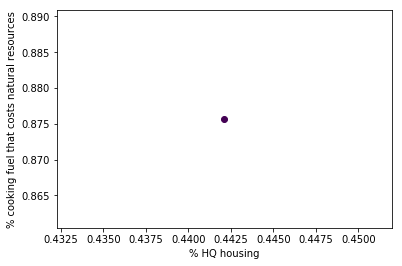

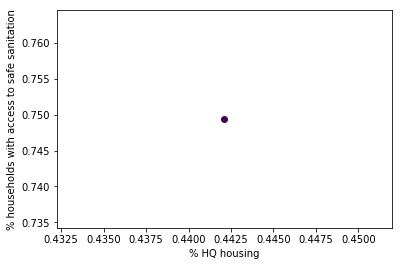

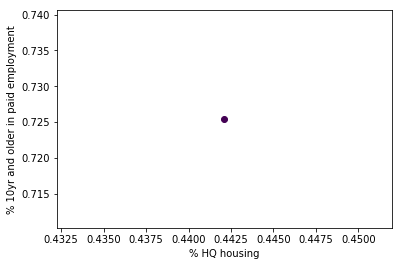

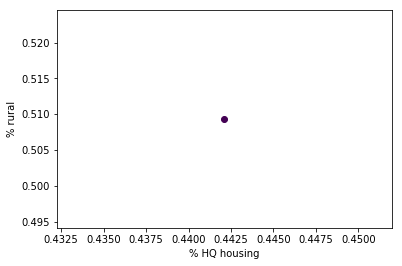

In [253]:
for i in range(len(x_indices)):
    for j in range(len(y_indices)):
        plt.figure()
        x_values = [vital_features[k][x_indices[i]] for k in range(len(vital_features)) if vital_features[k][x_indices[0]] > 0.4 and vital_features[k][y_indices[9]] > 0.6 and vital_features[k][y_indices[5]] < 0.5 and vital_features[k][y_indices[2]] < 0.4]
        y_values = [vital_features[k][y_indices[j]] for k in range(len(vital_features)) if vital_features[k][x_indices[0]] > 0.4 and vital_features[k][y_indices[9]] > 0.6 and vital_features[k][y_indices[5]] < 0.5 and vital_features[k][y_indices[2]] < 0.4]
        cd = [clusters2[k] for k in range(len(vital_features)) if vital_features[k][x_indices[0]] > 0.4 and vital_features[k][y_indices[9]] > 0.6 and vital_features[k][y_indices[5]] < 0.5 and vital_features[k][y_indices[2]] < 0.4]
        plt.xlabel(x_labels[i])
        plt.ylabel(y_labels[j])
        plt.scatter(x_values, y_values, c=cd)
        plt.legend()